In [1]:
import pandas as pd
import numpy as np

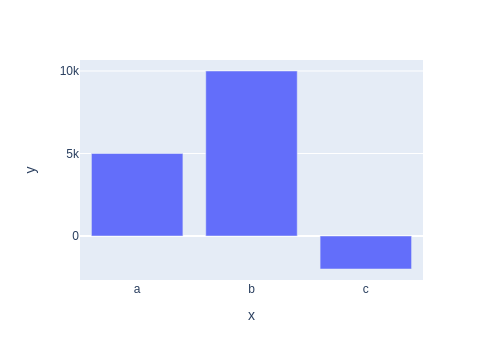

In [18]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[5000, 10000, -2000])
fig.show()

    country continent  year  lifeExp       pop    gdpPercap iso_alpha  iso_num
240  Canada  Americas  1952    68.75  14785584  11367.16112       CAN      124
241  Canada  Americas  1957    69.96  17010154  12489.95006       CAN      124
242  Canada  Americas  1962    71.30  18985849  13462.48555       CAN      124
243  Canada  Americas  1967    72.13  20819767  16076.58803       CAN      124
244  Canada  Americas  1972    72.88  22284500  18970.57086       CAN      124


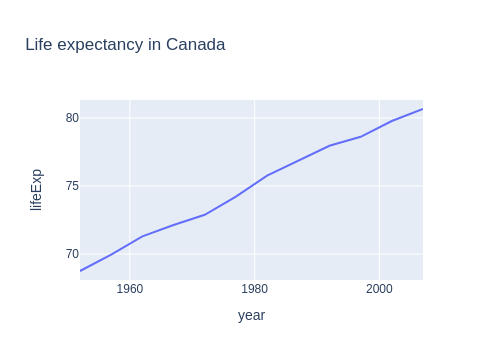

In [23]:
import plotly.express as px

df = px.data.gapminder().query("country=='Canada'")
print(df.head())
fig = px.line(df, x="year", y="lifeExp", title='Life expectancy in Canada')
fig.show()

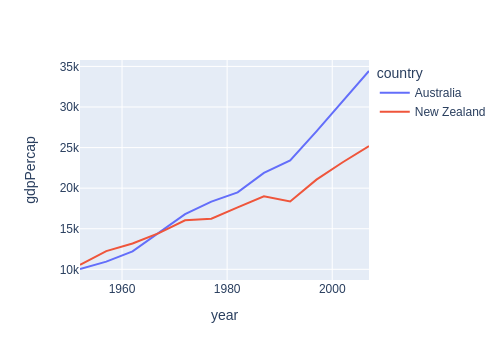

In [37]:
df = px.data.gapminder().query("continent=='Oceania'")
fig = px.line(df, x="year", y="gdpPercap", color='country')
fig.show()

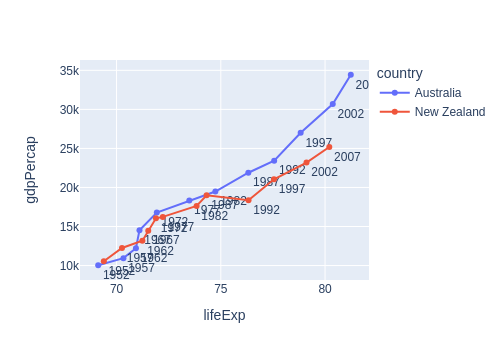

In [40]:
fig = px.line(df, x="lifeExp", y="gdpPercap", color="country", text="year")
fig.update_traces(textposition="bottom right")
fig.show()

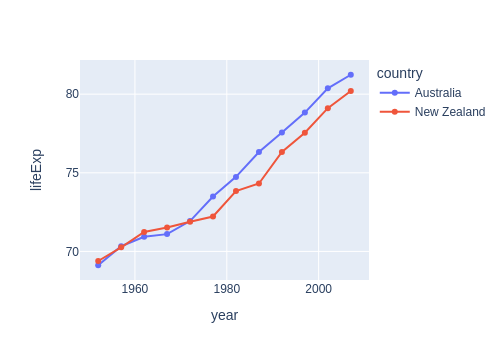

In [41]:
fig = px.line(df, x='year', y='lifeExp', color='country', markers=True)
fig.show()

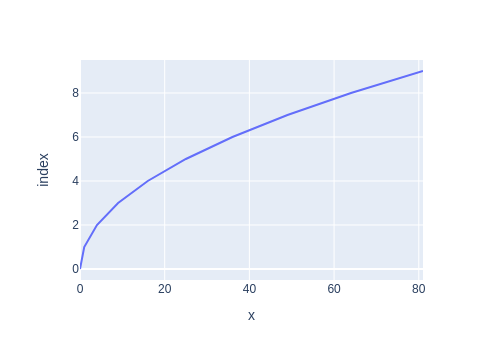

In [45]:
import plotly.graph_objects as go
x = np.arange(10)
px.line(go.Scatter(x=x, y=x**2)['x'] , go.Scatter(x=x, y=x**2)['y']).show()

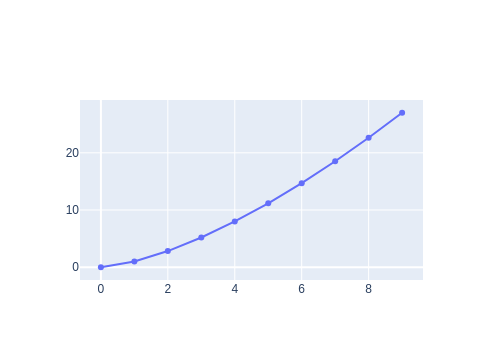

In [50]:
fig = go.Figure(data=go.Scatter(x=x, y=x**1.5))
fig.show()

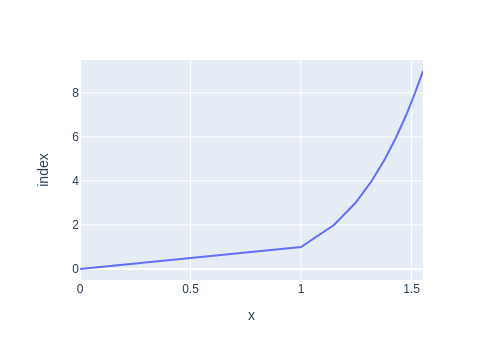

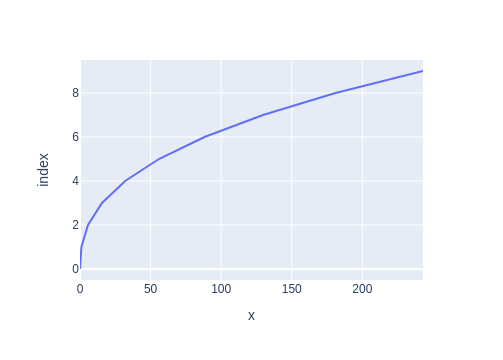

In [56]:
px.line(go.Scatter(x=x, y=x**2)['x'] , go.Scatter(x=x, y=x**2)['y'])
px.line(go.Scatter(x=x, y=x**.2)['x'] , go.Scatter(x=x, y=x**.2)['y']).show()
px.line(go.Scatter(x=x, y=x**2.5)['x'] , go.Scatter(x=x, y=x**2.5)['y'])

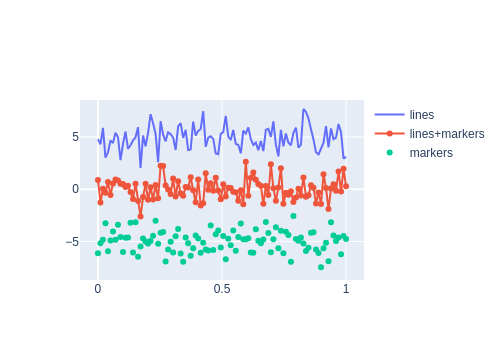

In [57]:
N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N) + 5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N) - 5

fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=random_y0,
                    mode='lines',
                    name='lines'))
fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines+markers',
                    name='lines+markers'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='markers', name='markers'))

fig.show()

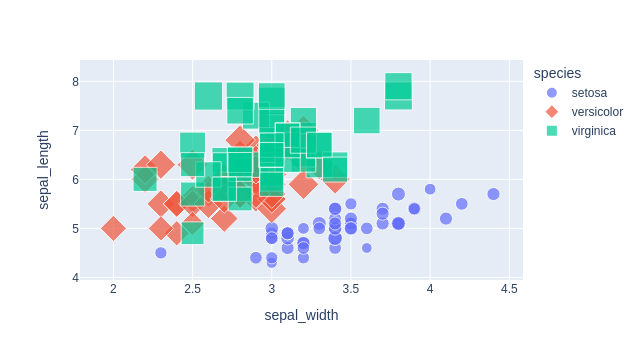

In [70]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", symbol="species",color="species",
                 size='petal_length', hover_data=['petal_width'])
fig.show()

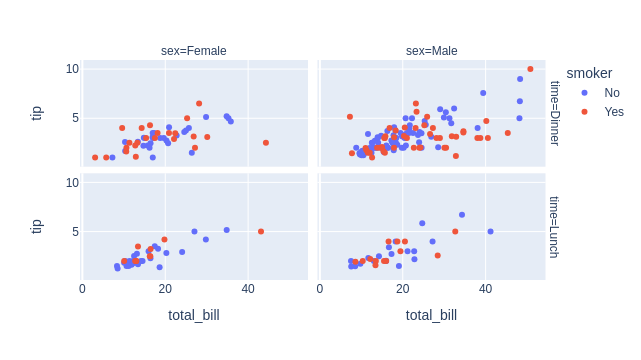

In [72]:
df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", color="smoker", facet_col="sex", facet_row="time")
fig.show()

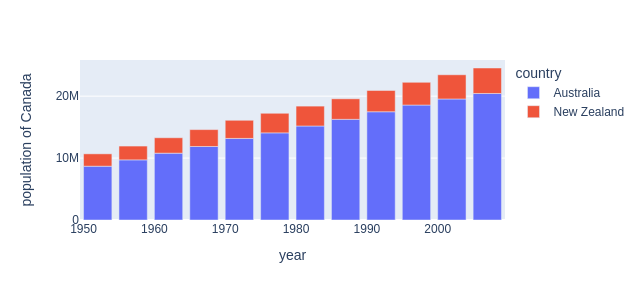

In [76]:
df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.bar(df, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='country',
             labels={'pop':'population of Canada'}, height=300)
fig.show()


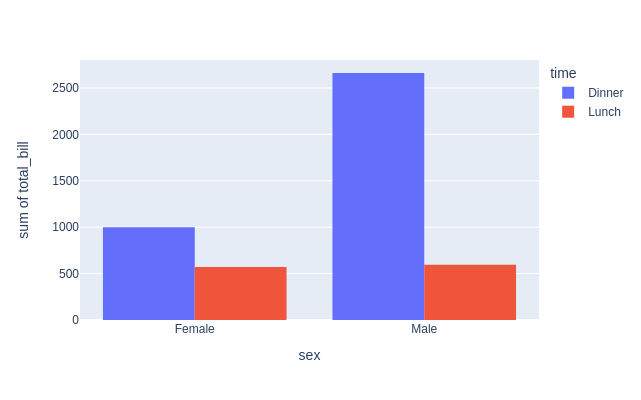

In [89]:
df = px.data.tips()
fig = px.histogram(df, x="sex", y="total_bill",
             color='time', barmode='group',
             height=400)
fig.show()

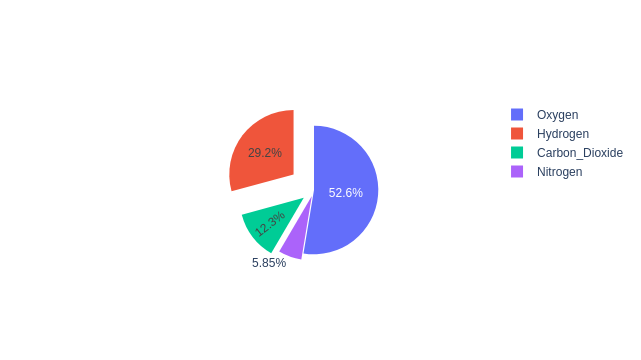

In [92]:
labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
values = [4500, 2500, 1053, 500]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.4, 0.2, 0.1])])
fig.show()

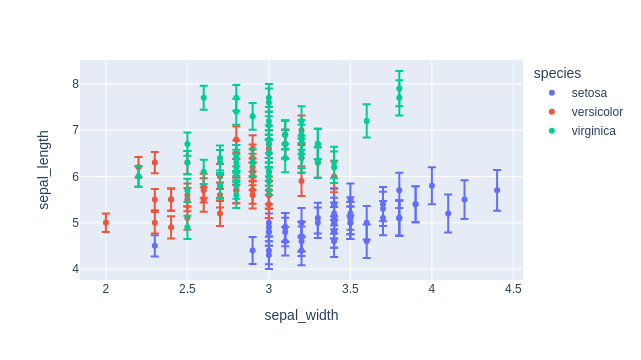

In [94]:
df = px.data.iris()
df["e_plus"] = df["sepal_width"]/10
df["e_minus"] = df["sepal_width"]/10
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 error_y="e_plus", error_y_minus="e_minus")
fig.show()

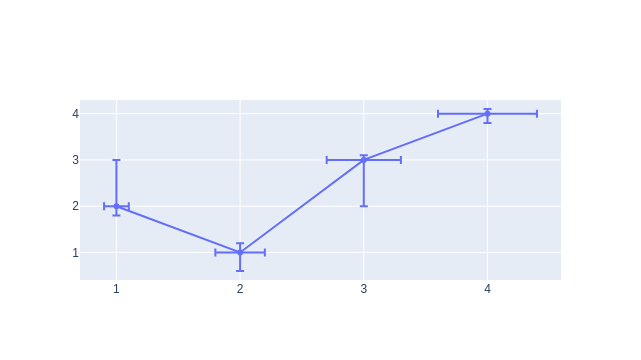

In [107]:
fig = go.Figure(data=go.Scatter(
        x=[1, 2, 3, 4],
        y=[2, 1, 3, 4],
        error_y=dict(
            array=[1, 0.2, 0.1, 0.1],
            arrayminus=[0.2, 0.4, 1, 0.2])
        ,
        error_x=dict(
            type='percent',
            value=10)
        ))
fig.show()

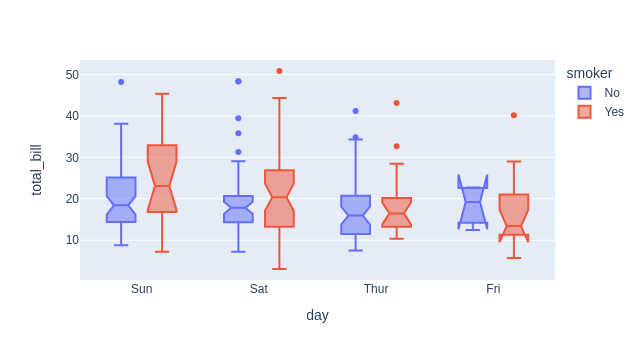

In [110]:
df = px.data.tips()

fig = px.box(df, x="day", y="total_bill", notched=True,color="smoker")
fig.update_traces(quartilemethod="exclusive")
fig.show()

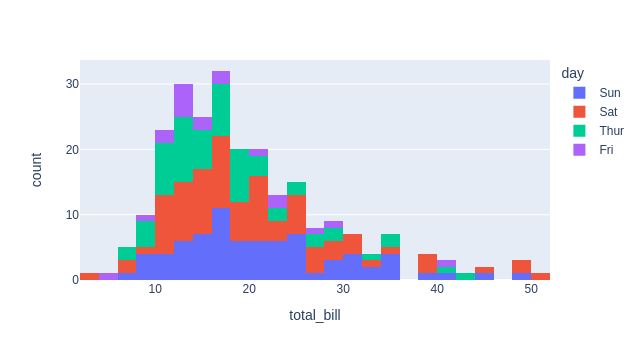

In [114]:
df = px.data.tips()
fig = px.histogram(df, x="total_bill", color="day")
fig.show()

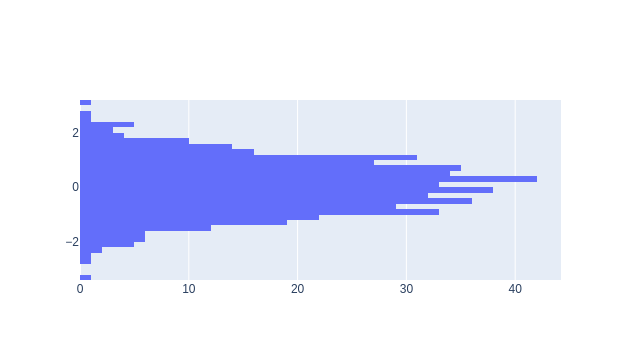

In [123]:
y = np.random.randn(500)
go.Figure(data=[go.Histogram(y=y)])

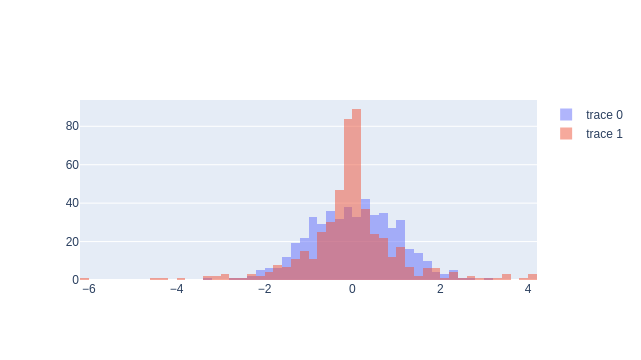

In [131]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=y))
fig.add_trace(go.Histogram(x=y*np.random.randn(500)))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.5)
fig.show()

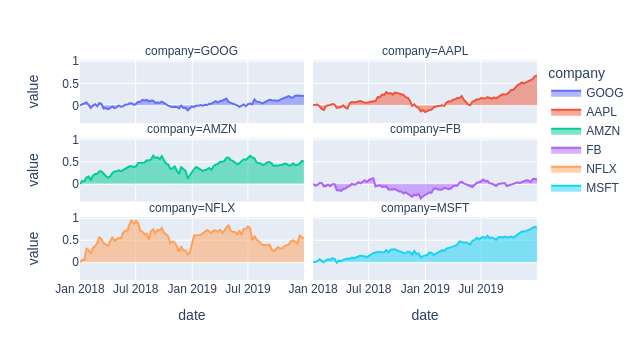

In [137]:
df = px.data.stocks(indexed=True)-1
fig = px.area(df, facet_col="company", facet_col_wrap=2)
fig.show()

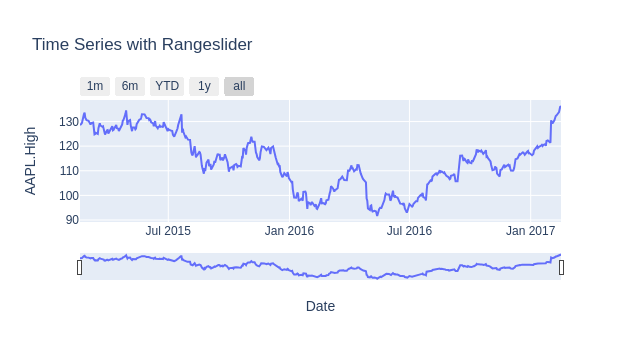

In [146]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = px.line(df, x='Date', y='AAPL.High', title='Time Series with Rangeslider')

fig.update_xaxes(rangeslider_visible=True,
                    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=2, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    ))
fig.show()

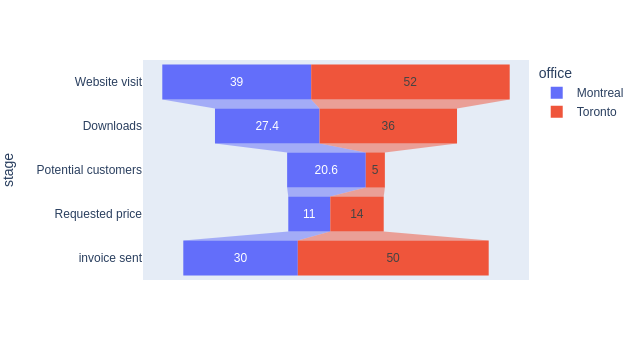

In [151]:
stages = ["Website visit", "Downloads", "Potential customers", "Requested price", "invoice sent"]
df_mtl = pd.DataFrame(dict(number=[39, 27.4, 20.6, 11, 30], stage=stages))
df_mtl['office'] = 'Montreal'
df_toronto = pd.DataFrame(dict(number=[52, 36, 5, 14, 50], stage=stages))
df_toronto['office'] = 'Toronto'
df = pd.concat([df_mtl, df_toronto], axis=0)
fig = px.funnel(df, x='number', y='stage', color='office')
fig.show()

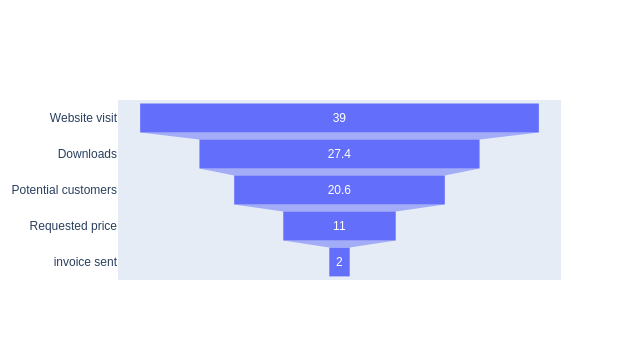

In [152]:
fig = go.Figure(go.Funnel(
    y = ["Website visit", "Downloads", "Potential customers", "Requested price", "invoice sent"],
    x = [39, 27.4, 20.6, 11, 2]))

fig.show()

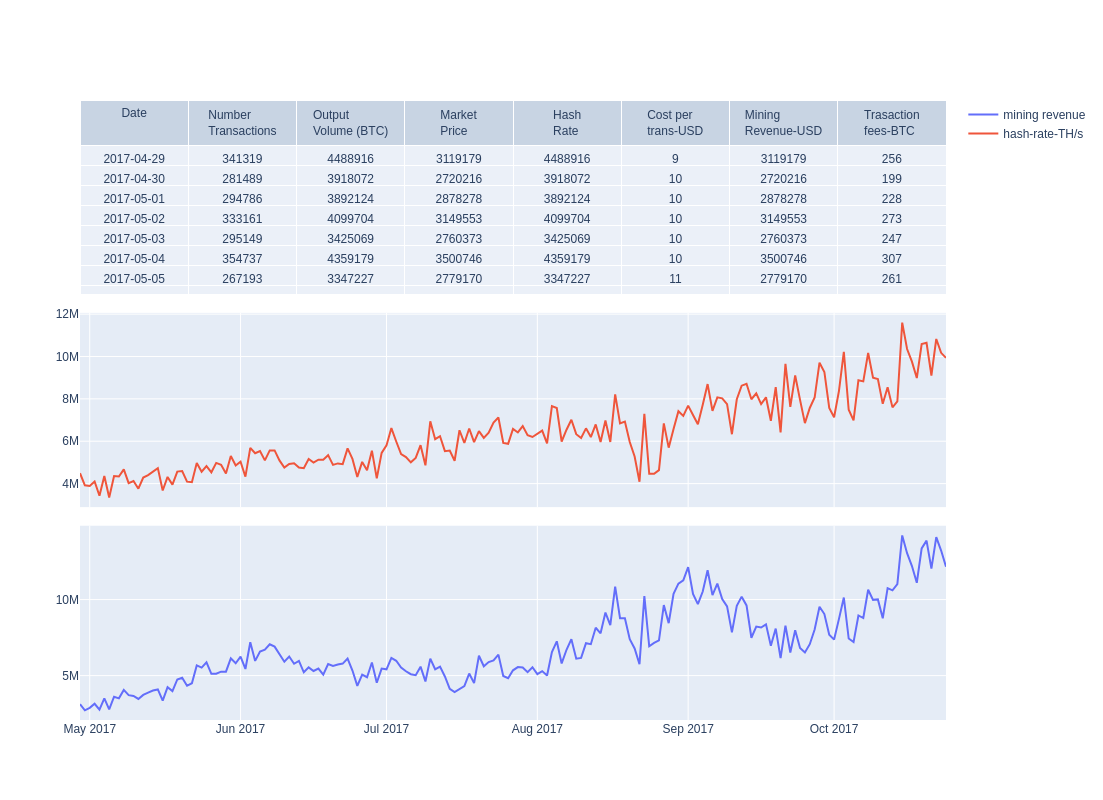

In [167]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd
import re

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/Mining-BTC-180.csv")

for i, row in enumerate(df["Date"]):
    p = re.compile(" 00:00:00")
    datetime = p.split(df["Date"][i])[0]
    df.iloc[i, 1] = datetime

fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "table"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]]
)

fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["Mining-revenue-USD"],
        mode="lines",
        name="mining revenue"
    ),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["Hash-rate"],
        mode="lines",
        name="hash-rate-TH/s"
    ),
    row=2, col=1
)

fig.add_trace(
    go.Table(
        header=dict(
            values=["Date", "Number<br>Transactions", "Output<br>Volume (BTC)",
                    "Market<br>Price", "Hash<br>Rate", "Cost per<br>trans-USD",
                    "Mining<br>Revenue-USD", "Trasaction<br>fees-BTC"],
            align="center"
        ),
        cells=dict(
            values=[df[k].tolist() for k in df.columns[1:]],
            align = "center")
    ),
    row=1, col=1
)
fig.update_layout(
    height=800,
    title_text="Bitcoin mining stats for 180 days",
)

fig.show()

In [11]:
df

,Unnamed: 0,Date,Number-transactions,Output-volume(BTC),Market-price,Hash-rate,Cost-per-trans-USD,Mining-revenue-USD,Transaction-fees-BTC
0,0,2017-04-29,341319,4488916,3119179,4488916,9,3119179,256
1,1,2017-04-30,281489,3918072,2720216,3918072,10,2720216,199
2,2,2017-05-01,294786,3892124,2878278,3892124,10,2878278,228
3,3,2017-05-02,333161,4099704,3149553,4099704,10,3149553,273
4,4,2017-05-03,295149,3425069,2760373,3425069,10,2760373,247
...,...,...,...,...,...,...,...,...,...
174,174,2017-10-20,312409,10649227,13875337,10649227,46,13875337,162
175,175,2017-10-21,312257,9102412,12037733,9102412,40,12037733,168
176,176,2017-10-22,289131,10827706,14108349,10827706,50,14108349,155
177,177,2017-10-23,316096,10173284,13224118,10173284,43,13224118,186


In [205]:
df = pd.read_csv("bitcoin.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp' , inplace=True)
df.head()

,Close
Timestamp,
2017-08-17 05:30:00,4285.08
2017-08-18 05:30:00,4108.37
2017-08-19 05:30:00,4139.98
2017-08-20 05:30:00,4086.29
2017-08-21 05:30:00,4016.00


In [206]:
df['ma10'] = df['Close'].rolling(window=10).mean()
df['ma50'] = df['Close'].rolling(window=50).mean()

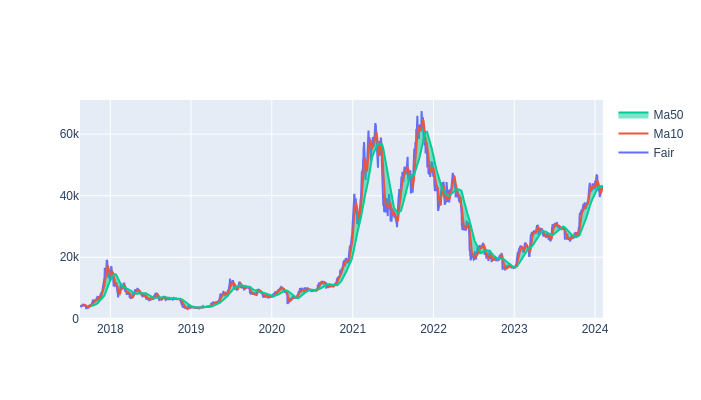

In [207]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.index, y=df['Close'],
    name='Fair',
))
fig.add_trace(go.Scatter(
    x=df.index, y=df['ma10'],
    name='Ma10',
))
fig.add_trace(go.Scatter(
    x=df.index, y=df['ma50'],
    name='Ma50',fill='tonexty'
))
fig.update_layout(
    height=400,
)

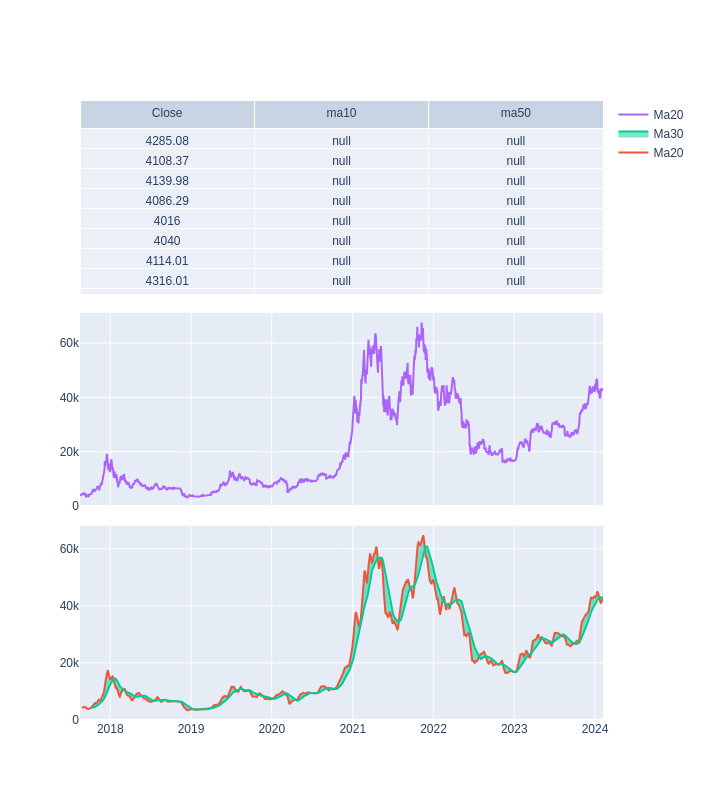

In [209]:

fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "table"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]]
)
fig.add_trace(
    go.Table(
        header=dict(
            values=["Close" , "ma10" , "ma50"],
            align="center"
        ),
        cells=dict(
            values=[df[k].tolist() for k in df.columns[:]],
            align = "center")
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df["ma10"],
        mode="lines",
        name="Ma20"
    ),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df["ma50"],
        mode="lines",
        name="Ma30", fill='tonexty'
    ),
    row=3, col=1 
)

fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df["Close"],
        mode="lines",
        name="Ma20"
    ),
    row=2, col=1
)
fig.update_layout(
    height=800,
)